In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/dataset_ml/mall customer')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
x=df.iloc[:,-2:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
#no.of cluster
from sklearn.cluster import KMeans
wcss=[]   #given to append ##variance
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

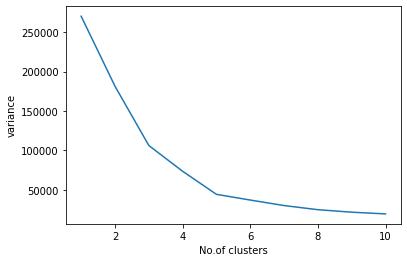

In [ ]:
#graph with respect to variance and clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('No.of clusters')
plt.ylabel('variance')
plt.show()

In [ ]:
#number of clusters is 5
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(x)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
x['cluster']=y_pred
x

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [ ]:
x1=x.iloc[:,:-1].values
x1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
y=x.iloc[:,-1].values
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.30,random_state=42)
x_train

array([[ 87,  63],
       [ 60,  50],
       [ 30,  73],
       [ 20,  15],
       [ 33,  81],
       [ 67,  57],
       [ 39,  36],
       [103,  85],
       [ 59,  55],
       [ 73,   7],
       [ 42,  60],
       [ 71,  95],
       [ 81,   5],
       [ 38,  92],
       [ 67,  43],
       [ 64,  46],
       [ 28,  32],
       [ 74,  72],
       [ 62,  41],
       [ 63,  54],
       [ 16,   6],
       [ 54,  48],
       [ 40,  55],
       [101,  68],
       [103,  69],
       [ 54,  46],
       [ 79,  83],
       [ 34,  17],
       [103,  23],
       [ 46,  55],
       [ 25,   5],
       [ 75,  93],
       [ 62,  48],
       [ 33,  92],
       [ 19,  99],
       [120,  16],
       [ 78,  73],
       [ 18,   6],
       [ 28,  61],
       [ 67,  56],
       [ 17,  40],
       [ 33,   4],
       [ 76,  40],
       [ 77,  97],
       [ 63,  48],
       [ 77,  12],
       [ 19,  14],
       [ 47,  52],
       [ 64,  42],
       [ 77,  36],
       [ 86,  20],
       [ 15,  39],
       [137,

In [ ]:
x_test

array([[ 60,  52],
       [ 20,  79],
       [ 30,   4],
       [ 78,   1],
       [ 71,  11],
       [ 65,  50],
       [ 48,  47],
       [ 87,  13],
       [ 88,  13],
       [ 39,  65],
       [ 48,  50],
       [ 98,  15],
       [ 85,  75],
       [ 54,  52],
       [101,  24],
       [ 88,  69],
       [ 44,  50],
       [ 78,  20],
       [ 54,  41],
       [ 48,  59],
       [ 70,  29],
       [ 21,  35],
       [ 78,  22],
       [ 60,  40],
       [ 48,  59],
       [ 46,  56],
       [ 54,  57],
       [ 48,  48],
       [ 70,  77],
       [ 72,  34],
       [ 19,  72],
       [ 23,  29],
       [ 43,  41],
       [ 54,  54],
       [ 78,  17],
       [ 62,  56],
       [ 73,  88],
       [ 73,  73],
       [ 85,  26],
       [ 54,  53],
       [ 54,  42],
       [126,  74],
       [ 37,  26],
       [ 28,  14],
       [ 69,  58],
       [120,  79],
       [ 29,  87],
       [ 23,  98],
       [ 76,  87],
       [ 57,  58],
       [ 65,  48],
       [ 87,  92],
       [ 17,

In [ ]:
y_train

array([[4],
       [0],
       [3],
       [2],
       [3],
       [0],
       [2],
       [4],
       [0],
       [1],
       [0],
       [4],
       [1],
       [3],
       [0],
       [0],
       [2],
       [4],
       [0],
       [0],
       [2],
       [0],
       [0],
       [4],
       [4],
       [0],
       [4],
       [2],
       [1],
       [0],
       [2],
       [4],
       [0],
       [3],
       [3],
       [1],
       [4],
       [2],
       [3],
       [0],
       [2],
       [2],
       [0],
       [4],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
       [4],
       [0],
       [4],
       [0],
       [2],
       [4],
       [2],
       [2],
       [0],
       [4],
       [1],
       [3],
       [3],
       [1],
       [4],
       [0],
       [3],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [3],
       [0],
       [0],
       [4],
       [1],
       [1],
       [4],
    

In [ ]:
y_test

array([[0],
       [3],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [3],
       [0],
       [1],
       [4],
       [0],
       [1],
       [4],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [3],
       [2],
       [0],
       [0],
       [1],
       [0],
       [4],
       [4],
       [1],
       [0],
       [0],
       [4],
       [2],
       [2],
       [0],
       [4],
       [3],
       [3],
       [4],
       [0],
       [0],
       [4],
       [3],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
y_pred

array([0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 4, 0, 1, 4, 0, 1, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 4, 1, 3, 2, 0, 0, 1, 0, 4, 4, 1, 0, 0, 4, 2, 2,
       4, 4, 3, 3, 4, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9333333333333333